# Домашнее задание к семинару 05 (HW05)
## Тема: линейные модели и честный ML-эксперимент (логистическая регрессия, бейзлайн, метрики).

**Содержание:**
- Загрузка данных и первичный анализ
- Подготовка признаков и таргета
- Создание baseline-модели
- Логистическая регрессия и подбор гиперпараметров

---

### 1. Загрузка данных и первичный анализ

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

Загрузим датасет в виде датафрейма и рассмотрим типы данных данных
признаков, а также проверим их на наличие пропущенных значений

In [3]:
df = pd.read_csv("data\S05-hw-dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [4]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [5]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [6]:
df["default"].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Итак, в результате первичного анализа было выяснено следующее:
- датасет содержим 3000 объектов, 17 признаков;
- пропуски в данных отсутствуют;
- все признаки являются числовыми; 
- все признаки, кроме двух - debt_to_income, region_risk_score - целочисленные;
- отрицательные значения может принимать только признак checking_balance;
- нет аномалий среди максимальных и минимальных значений;
- наблюдается неравномерное распределение значений таргетного признака "default".

### Подгтовка признаков и таргета

In [13]:
# разделение признаков и таргета
X = df.drop(columns=["client_id", "default"])
y = df["default"]

# разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,                # обучающая выборка
    y,                # тестовая выборка
    test_size=0.2,    # размер тестовой выборки
    random_state=52,  # для воспроизводимости результатов
    stratify=y        # для сохранения баланса классов
)

### Создание baseline-модели
#### Stratified classification

In [14]:
dummy = DummyClassifier(
    strategy="stratified",
    random_state=52
)

dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)
y_proba = dummy.predict_proba(X_test)[:, 1]

In [15]:
dummy_accuracy = accuracy_score(y_test, y_pred)
dummy_report = classification_report(y_test, y_pred)
dummy_roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {dummy_accuracy:.4f}")
print(f"ROC AUC: {dummy_roc_auc:.4f}")
print(f"Classification Report: \n\n {dummy_report}")


Accuracy: 0.5000
ROC AUC: 0.4919
Classification Report: 

               precision    recall  f1-score   support

           0       0.58      0.54      0.56       354
           1       0.40      0.45      0.42       246

    accuracy                           0.50       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.51      0.50      0.50       600



#### Most-frequent classification

In [16]:
dummy = DummyClassifier(
    strategy="most_frequent",
    random_state=52
)

dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)
y_proba = dummy.predict_proba(X_test)[:, 1]

In [17]:
dummy_accuracy = accuracy_score(y_test, y_pred)
dummy_report = classification_report(y_test, y_pred, zero_division=0)
dummy_roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {dummy_accuracy:.4f}")
print(f"ROC AUC: {dummy_roc_auc:.4f}")
print(f"Classification Report: \n\n {dummy_report}")

Accuracy: 0.5900
ROC AUC: 0.5000
Classification Report: 

               precision    recall  f1-score   support

           0       0.59      1.00      0.74       354
           1       0.00      0.00      0.00       246

    accuracy                           0.59       600
   macro avg       0.29      0.50      0.37       600
weighted avg       0.35      0.59      0.44       600



### Логистическая регрессия и подбор гиперпараметров

In [18]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=52))
])

In [19]:
param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0]
}

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="roc_auc", 
    n_jobs=1
)

grid.fit(X_train, y_train)

print("Лучший параметр C:", grid.best_params_['logreg__C'])
print("Лучший ROC-AUC на CV:", round(grid.best_score_, 4))


Лучший параметр C: 0.1
Лучший ROC-AUC на CV: 0.8615


In [20]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_roc_auc = roc_auc_score(y_test, y_proba)

print(f"Test accuracy: {logreg_accuracy:.4f}")
print(f"Test ROC-AUC:  {logreg_roc_auc:.4f}")
print(f"Classification Report: \n\n {classification_report(y_test, y_pred)}")


Test accuracy: 0.7950
Test ROC-AUC:  0.8701
Classification Report: 

               precision    recall  f1-score   support

           0       0.81      0.85      0.83       354
           1       0.77      0.72      0.74       246

    accuracy                           0.80       600
   macro avg       0.79      0.78      0.79       600
weighted avg       0.79      0.80      0.79       600



График ROC кривой сохранен: figures/roc_auc_curve.png
График PR кривой сохранен: figures/pr_curve.png


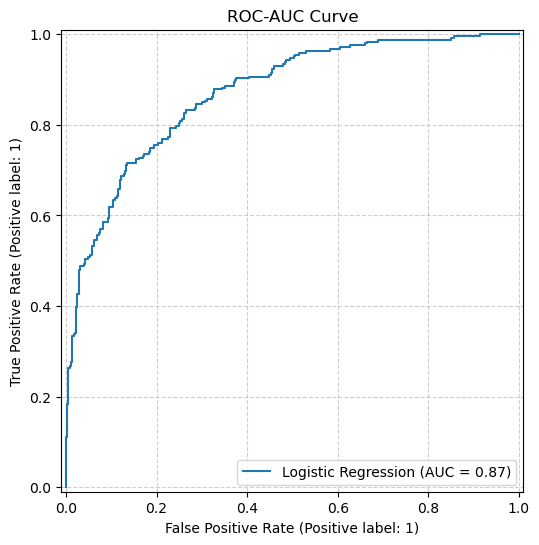

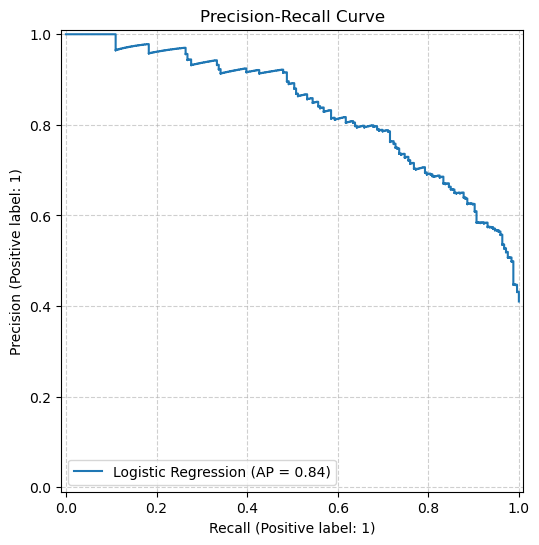

In [22]:
import matplotlib.pyplot as plt
import os
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

output_dir = "figures/"

# ROC-кривая
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax, name="Logistic Regression")
plt.title("ROC-AUC Curve")
plt.grid(True, linestyle='--', alpha=0.6)

roc_path = os.path.join(output_dir, "roc_auc_curve.png")
plt.savefig(roc_path)
print(f"График ROC кривой сохранен: {roc_path}")

# PR-кривая
fig2, ax2 = plt.subplots(figsize=(8, 6))
PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, ax=ax2, name="Logistic Regression")
plt.title("Precision-Recall Curve")
plt.grid(True, linestyle='--', alpha=0.6)

pr_path = os.path.join(output_dir, "pr_curve.png")
plt.savefig(pr_path)
print(f"График PR кривой сохранен: {pr_path}")

plt.show()

### Сравнение бейзлайна и логистической регрессии

In [23]:
results = pd.DataFrame({
    "Model": ["Dummy Classifier", "Logistic Regression"],
    "Accuracy": [dummy_accuracy, logreg_accuracy],
    "ROC-AUC": [dummy_roc_auc, logreg_roc_auc]
})

# сравниваем по двум метрикам, потому что акцент в работе на них
print("Сравнение моделей:")
print(results.round(4))

Сравнение моделей:
                 Model  Accuracy  ROC-AUC
0     Dummy Classifier     0.590   0.5000
1  Logistic Regression     0.795   0.8701


## Отчёт

В эксперименте **бейзлайн-модель** (Dummy Classifier) показала *ожидаемо низкое* (игнор признаков, только колонка с ответами) качество: её <u>ROC-AUC</u> равен 0.5, что эквивалентно случайному угадыванию, а <u>Accuracy</u> составила 0.59. **Логистическая регрессия** продемонстрировала значительный прирост эффективности: метрика <u>Accuracy</u> *выросла* более чем на 20 процентных пунктов (до 0.795), а <u>ROC-AUC</u> *увеличился* до 0.87, что говорит о высокой способности модели разделять классы.

При переборе гиперпараметра $C$ было выявлено, что модель **чувствительна к этому параметру**. Выбор оптимального значения позволил избежать как недообучения (при слишком малых $C$), так и переобучения, обеспечив баланс между точностью на обучающей выборке и обобщающей способностью на тестовых данных.

На построенных графиках превосходство логистической регрессии выражено визуально:

--- <u>На ROC-кривой</u>: линия логистической регрессии значительно выгнута в сторону левого верхнего угла, что подтверждает *высокую долю* истинно положительных ответов при низкой доле ложных срабатываний. Кривая бейзлайна при этом выглядит как прямая диагональ (случайный классификатор).

--- <u>На PR-кривой</u>: модель удерживает *высокий уровень Precision* (точности) даже при увеличении Recall (полноты), располагаясь существенно выше бейзлайна, что особенно важно для задач с возможным дисбалансом классов.

<u>Выводы</u>

* Логистическая регрессия являетcя **разумным выбором** для данной задачи, так как она дает кратный прирост качества по сравнению с бейзлайном.

* Высокий показатель ROC-AUC (0.87) позволяет использовать данную модель **в реальных условиях** для ранжирования клиентов по степени риска.

* Модель хорошо **сбалансирована и интерпретируема**, что критически важно для задач кредитного скоринга (или анализа дефолтов), представленных в датасете.